In [2]:
import numpy as np
import random as r
import math as m
from typing import Tuple, List 

In [3]:
def generate_potential(base_potential: Tuple[float, float],number: int, Arange: Tuple[float,float], width: float, nmax:int) -> List[List[float]]:
    
    
        p = []

        fbase = 2 * m.pi / width
        forg = 2 * m.pi
        p.append((base_potential[0], base_potential[1] * fbase, 0))
        
        for null in range(number):
            A = r.random() * (Arange[1] - Arange[0]) + Arange[0]
            freq = fbase * r.randint(1, nmax)
            phase = r.random() * fbase

            p.append((A, freq, phase))
            
           
        return p
                
def view_potential(input: List[Tuple[float, float, float]], width):
    
    N = 1000
    den = width / N
    potential = np.zeros(N * N).reshape(N,N)
    for element in input:
        for y in range(len(potential)):
            for x in range(len(potential[0])):
                p = x * den
                A = element[0]
                freq = element[1]
                phase = element[2]
                potential[y][x] += A * m.cos(p * freq + phase)
    
    from matplotlib import pyplot as plt
    fig, axs = plt.subplots(2)
    axs[0].imshow(potential, extent=[-5,5,0,40],aspect=0.2)
    x = np.linspace(-width/2,width/2,len(potential[0]))
    axs[1].plot(x,potential[0])
    plt.savefig("potential.png", dpi=300, bbox_inches='tight')

    


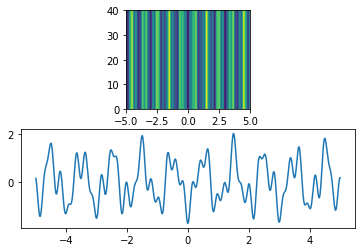

In [5]:
p = generate_potential((-1,10),5,(0,0.5),10,40)
view_potential(p,10)